In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Book1.csv',  sep='|', engine='python')

In [3]:
data = df.drop(labels=['N_SBTINGGI', 'N_SBRENDAH', 'NRATA'], axis=1)

In [4]:
data.columns = ['tgl','bank-sk','bank','sb-tinggi','sb-rendah','rata']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tgl        1615 non-null   object 
 1   bank-sk    1615 non-null   int64  
 2   bank       1615 non-null   object 
 3   sb-tinggi  1615 non-null   float64
 4   sb-rendah  1615 non-null   float64
 5   rata       1615 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 75.8+ KB


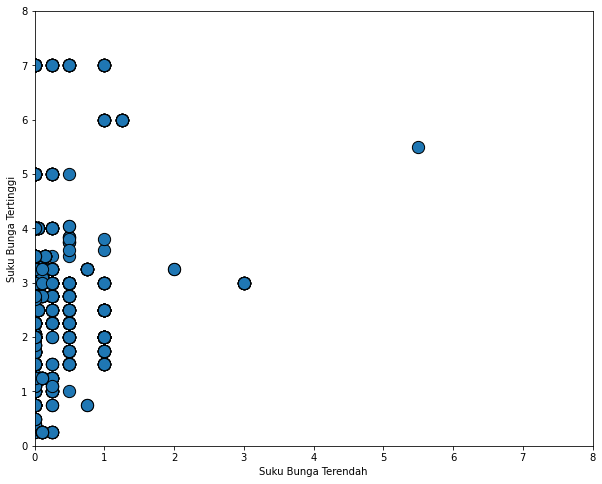

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(data['sb-rendah'], data['sb-tinggi'], s=150, edgecolor='k', marker='o')
plt.xlim(0,8)
plt.ylim(0,8)
ax.set_xlabel('Suku Bunga Terendah')
ax.set_ylabel('Suku Bunga Tertinggi')
plt.show()
plt.show()

In [44]:
dt_more = group.loc[group['sb-tinggi'] > 3.5]

In [46]:
dt_more

,,sb-tinggi,sb-rendah
bank-sk,bank,,
46,PT.BANK DBS INDONESIA,4.000000,0.000000
48,PT.BANK MIZUHO INDONESIA,4.000000,0.250000
50,STANDARD CHARTERED BANK,5.000000,0.000000
95,PT.BANK JTRUST INDONESIA Tbk.,4.000000,0.000000
126,PT.BANK SULSELBAR,5.000000,0.250000
127,B.P.D. SULAWESI UTARA GORONTALO,7.000000,0.000000
490,"PT BANK NEO COMMERCE, TBK",6.000000,1.250000
494,"PT.BANK RAKYAT INDONESIA AGRONIAGA, Tbk.",7.000000,0.250000
513,PT.BANK INA PERDANA,4.000000,0.000000


In [40]:
group = data.groupby(['bank-sk','bank'])['sb-tinggi','sb-rendah'].mean()

<ipython-input-40-056c2a72016d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = data.groupby(['bank-sk','bank'])['sb-tinggi','sb-rendah'].mean()


In [41]:
group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 85 entries, (2, 'PT.BANK RAKYAT INDONESIA (PERSERO) Tbk') to (950, 'PT.BANK COMMONWEALTH')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sb-tinggi  85 non-null     float64
 1   sb-rendah  85 non-null     float64
dtypes: float64(2)
memory usage: 2.9+ KB


In [ ]:
group_reshape = group.values.reshape(-1,2)
sc_group_reshape = StandardScaler()

In [ ]:
group_std = sc_group_reshape.fit_transform(group_reshape.astype(float))

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit_predict(group_std)

labels = kmeans.labels_

from sklearn.metrics import silhouette_score
score = silhouette_score(group_std, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

In [ ]:
sns.scatterplot(group_std[0],group_std[1],hue=labels,palette='inferno_r')

In [ ]:
new_group = pd.DataFrame(data = group_std, columns = ['sb-rendah','sb-tinggi'])
new_group['label_kmeans'] = labels

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 0],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 0],
            color = "blue", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 1],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 2],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 2],
            color = "green", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 3],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 3],
            color = "yellow", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 4],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 4],
            color = "black", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 5],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 5],
            color = "purple", s=100, edgecolor='green',linestyle='--')

ax.set_xlabel('sb-rendah')
ax.set_ylabel('sb-tinggi')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 0],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 0],
            color = "blue", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 1],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_group['sb-rendah'][new_group['label_kmeans'] == 2],
            new_group['sb-tinggi'][new_group['label_kmeans'] == 2],
            color = "green", s=100, edgecolor='green',linestyle='--')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50);
ax.set_xlabel('sb-rendah')
ax.set_ylabel('sb-tinggi')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 

for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(group) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(group)

In [ ]:
y_kmeans

In [ ]:
plt.scatter(group[y_kmeans == 0, 0], group[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(group[y_kmeans == 1, 0], group[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(group[y_kmeans == 2, 0], group[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.xlabel('sb-rendah') 
plt.ylabel('sb-tinggi') 
plt.legend() 

plt.show()